In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

### Scikit-Learn:

A library consisting of various datasets, perfect for machine learning!

In [19]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 0.25, max(X[:,0]) + 0.25, 50)
    y_span = np.linspace(min(X[:,1]) - 0.25, max(X[:,1]) + 0.25, 50)
    
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

In [20]:
np.random.seed(0)

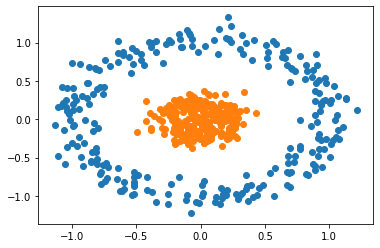

In [21]:
n_pts = 500

# noise -> a high noise (i.e 0.8) will cause the data points tp become overly convoluted, making it a lot
# harder to classift the data, you want to ensure that the noise ie kept relatively low (i.e 0.1)
X, y = datasets.make_circles(n_samples = n_pts, random_state = 123, noise = 0.1, factor = 0.2)

# selectively plot the points
plt.scatter(X[y == 0, 0],X[y == 0, 1])
plt.scatter(X[y == 1, 0],X[y == 1, 1])

In [22]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation = 'sigmoid'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(Adam(lr = 0.01), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [23]:
h = model.fit(x = X, y = y, verbose = 1, batch_size = 20, epochs = 100, shuffle = 'true')

Epoch 1/100
500/500 [==============================] - 0s 607us/step - loss: 0.7372 - accuracy: 0.5280
Epoch 2/100
500/500 [==============================] - 0s 54us/step - loss: 0.6964 - accuracy: 0.4460
Epoch 3/100
500/500 [==============================] - 0s 52us/step - loss: 0.6945 - accuracy: 0.3500
Epoch 4/100
500/500 [==============================] - 0s 52us/step - loss: 0.6943 - accuracy: 0.6200
Epoch 5/100
500/500 [==============================] - 0s 53us/step - loss: 0.6937 - accuracy: 0.5600
Epoch 6/100
500/500 [==============================] - 0s 53us/step - loss: 0.6933 - accuracy: 0.4360
Epoch 7/100
500/500 [==============================] - 0s 54us/step - loss: 0.6928 - accuracy: 0.4600
Epoch 8/100
500/500 [==============================] - 0s 55us/step - loss: 0.6924 - accuracy: 0.3740
Epoch 9/100
500/500 [==============================] - 0s 55us/step - loss: 0.6918 - accuracy: 0.5420
Epoch 10/100
500/500 [==============================] - 0s 58us/step - loss: 0.69

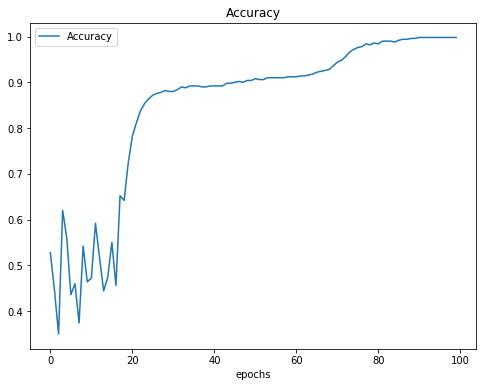

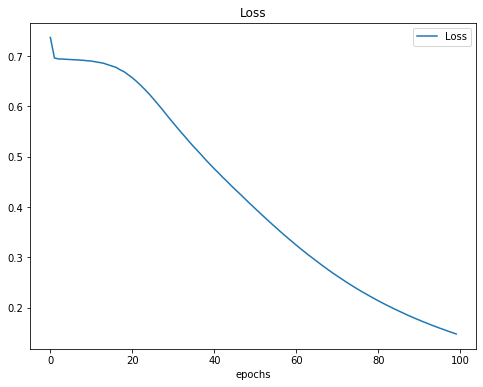

In [24]:
plt.figure(figsize = (8,6))
plt.plot(h.history['accuracy'])
plt.title('Accuracy')
plt.xlabel('epochs')
plt.legend(['Accuracy'])

plt.figure(figsize = (8,6))
plt.plot(h.history['loss'])
plt.title('Loss')
plt.xlabel('epochs')
plt.legend(['Loss'])

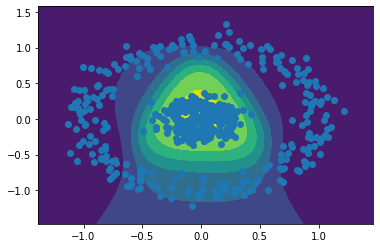

In [25]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])